<a href="https://colab.research.google.com/github/alexandrgsv/stock_prediction_models/blob/main/MMVB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install pyswarm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from pyswarm import pso

# Load data from CSV file
data = pd.read_csv('https://drive.google.com/uc?id=18RjIb6w6OXLPeKYJ-UJKUNtmY71RpP5D', header=0)

data.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,03/03/03,0,341.69,352.4298,341.5213,352.24,5712759495
1,04/03/03,0,352.70,353.3022,347.5480,348.40,4050061227
2,05/03/03,0,348.38,358.3621,345.0087,357.65,6896025518
3,06/03/03,0,357.92,363.3684,357.6532,359.97,7538987193
4,07/03/03,0,359.83,359.9712,354.5339,354.87,4404810487


In [67]:
# Convert date strings to datetime objects
data['<DATE>'] = pd.to_datetime(data['<DATE>'], format='%d/%m/%y')

# Sort data by date
data = data.sort_values('<DATE>')

# Convert closing prices to a numpy array
values = data['<CLOSE>'].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
values = values.reshape(-1,1)
values = scaler.fit_transform(values)



In [68]:
# Split data into training and testing sets
split_idx = int(0.99 * len(values))
train_data = values[:split_idx]
test_data = values[split_idx+1:]

test_X_labels = data['<DATE>'].iloc[split_idx+1:-1]


In [70]:
# Reshape data for input to MLPRegressor
train_X = train_data[:-1].reshape(-1, 1)
train_y = train_data[1:].reshape(-1, 1)

test_X = test_data[:-1].reshape(-1, 1)
test_y = test_data[1:].reshape(-1, 1)

def constraint_function(x, ieqcons):
    return np.min(ieqcons(x))


# Define function to optimize
def objective_function(params, train_X, train_y):
    # Create ANN with specified parameters
    hidden_layer_sizes = (int(params[0]), int(params[1]))
    activation = 'relu' if params[2] < 0.5 else 'logistic'
    solver = 'adam' if params[3] < 0.5 else 'lbfgs'
    alpha = 10.0 ** -params[4]
    learning_rate_init = 10.0 ** -params[5]
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate_init=learning_rate_init)

    # Train ANN and evaluate performance
    model.fit(train_X, train_y.ravel())
    y_pred = model.predict(test_X)
    mse = np.mean((test_y - y_pred) ** 2)
    return mse

# Define optimization bounds and initial guess
lb = [1, 1, 0, 0, -5, -5]
ub = [10, 10, 1, 1, 0, 0]
x0 = np.array([5, 5, 0.5, 0.5, -2.5, -2.5])

def constraints(x, train_X, train_y):
  return x[0] - x[1], x[1] - x[2] 


# Optimize function using FIPSO
params, _ = pso(objective_function, lb, ub, ieqcons=[constraints], f_ieqcons=None, args=(train_X, train_y), swarmsize=40, maxiter=50, debug=True)


# Create final ANN with optimized parameters
hidden_layer_sizes = (int(params[0]), int(params[1]))
activation = 'relu' if params[2] < 0.5 else 'logistic'
solver = 'adam' if params[3] < 0.5 else 'lbfgs'
alpha = 10.0 ** -params[4]
learning_rate_init = 10.0 ** -params[5]
model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate_init=learning_rate_init)

# Train final ANN and predict closing prices intervals
model.fit(train_X, train_y)
y_pred = model.predict(test_X)


Converting ieqcons to a single constraint function


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


New best for swarm at iteration 1: [ 7.37530904  1.          0.86800615  0.8932338  -0.13815902 -0.73001174] 0.0007541885771727447


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


New best for swarm at iteration 1: [5.16604407 3.35344416 0.83170905 0.88620101 0.         0.        ] 0.0007450110227937467


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 1: [5.16604407 3.35344416 0.83170905 0.88620101 0.         0.        ] 0.0007450110227937467
New best for swarm at iteration 2: [6.23562102 2.92604969 1.         1.         0.         0.        ] 0.0007431824009101204
New best for swarm at iteration 2: [10.          3.92200052  1.          0.98967094  0.         -1.69005719] 0.0007353534593354859
Best after iteration 2: [10.          3.92200052  1.          0.98967094  0.         -1.69005719] 0.0007353534593354859
Best after iteration 3: [10.          3.92200052  1.          0.98967094  0.         -1.69005719] 0.0007353534593354859
New best for swarm at iteration 4: [10.          3.93816023  0.56734198  1.          0.         -0.36297069] 0.0007341354264595378
Best after iteration 4: [10.          3.93816023  0.56734198  1.          0.         -0.36297069] 0.0007341354264595378
Best after iteration 5: [10.          3.93816023  0.56734198  1.          0.         -0.36297069] 0.0007341354264595378
New best for swarm 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 7: [10.          4.87152543  0.60934138  0.94706419  0.         -2.10712696] 0.000730562677284875
New best for swarm at iteration 8: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
Best after iteration 8: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best after iteration 9: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
Best after iteration 10: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
Best after iteration 11: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
Best after iteration 12: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
Best after iteration 13: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
Best after iteration 14: [ 7.9239734   4.35456338  0.69348962  0.96122262  0.         -1.41289882] 0.0007277015102136685
New best for swarm at iteration 15: [ 8.17138974  4.25869408  0.7224892   0.9644388   0.         -1.40267678] 0.0007258443042899116
Best after iteration 15: [ 8.17138974  4.25869408  0.7224892   0.9644388   0.         -1.40267678] 0.0007258443042899116
Best after iteration 1

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


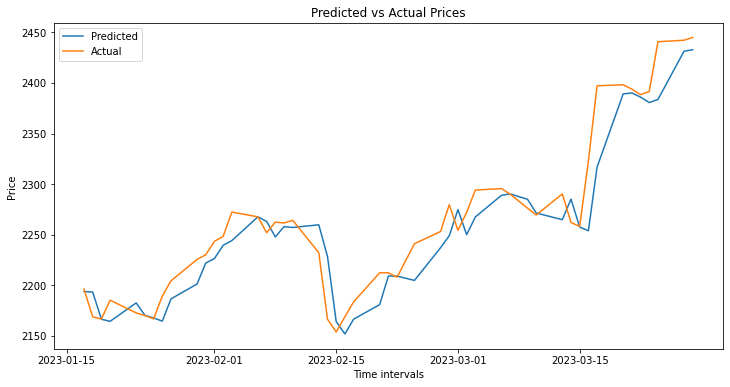

In [71]:
import matplotlib.pyplot as plt

# Train final ANN and predict closing prices
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

# Visualize predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(test_X_labels, scaler.inverse_transform(y_pred.reshape(-1,1)), label='Predicted')
plt.plot(test_X_labels, scaler.inverse_transform(test_y.reshape(-1,1)), label='Actual')
plt.xlabel('Time intervals')
plt.ylabel('Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

In [124]:
# Let us see in the future for 60 days

from datetime import datetime, timedelta

# set the new start date
start_date = datetime(2023, 3, 30)

# set the end date
end_date = start_date + timedelta(days=60)

# create an array of dates using date_range function
date_array = pd.date_range(start=start_date, end=end_date)

date_array = date_array.to_numpy().astype('datetime64[D]')


In [125]:
all_X = values[:-1].reshape(-1, 1)
all_Y = values[1:].reshape(-1, 1)

In [126]:
# Train final ANN on all the data available and predict closing prices

model.fit(all_X, all_Y)

y_final = all_Y[-1]

y_pred = np.array([])

for i in range(61):
  y_final = model.predict(y_final.reshape(-1,1))
  y_pred = np.append(y_pred, y_final)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


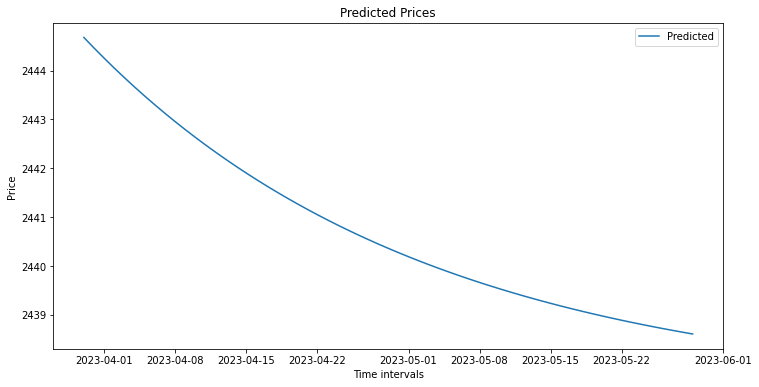

In [127]:
# Visualize predicted prices
plt.figure(figsize=(12, 6))
plt.plot(date_array, scaler.inverse_transform(y_pred.reshape(-1,1)), label='Predicted')
plt.xlabel('Time intervals')
plt.ylabel('Price')
plt.title('Predicted Prices')
plt.legend()
plt.show()